# Metehan Ayhan - Image Classification with CNN

Bu proje, konvolüsyonel sinir ağları (CNN) kullanarak sıtma hastalığına neden olan enfekte hücreleri tespit etmeyi amaçlamaktadır. Verisetimiz, sıtma enfeksiyonlarını belirlemek için iki ana kategoriye ayrılmış 27,558 görüntü içermektedir: "Infected" (Enfekte) ve "Uninfected" (Enfekte Olmayan). Bu proje kapsamında, bu görüntüleri kullanarak bir CNN modelinin eğitilmesi ve enfekte hücrelerin doğru bir şekilde sınıflandırılması sağlanacaktır. Eğitim sürecinde, modelin doğruluğunu ve güvenilirliğini artırmak için veri ön işleme, model tasarımı ve performans değerlendirmesi aşamaları gerçekleştirilecektir. Sonuç olarak, modelin etkili bir şekilde enfekte hücreleri tanımlaması beklenmektedir.

<img src='https://storage.googleapis.com/kaggle-datasets-images/87153/200743/31c387765e937986306b32afe5b7148c/dataset-cover.jpg?t=2018-12-05-05-57-20' width='700'>

### Let's Install Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Import Data

In [7]:
train_dir = 'C:/Users/metehan/Documents/Yapay Zeka Kampı/Projects/Image Classification Malaria/dataset/train'
test_dir = 'C:/Users/metehan/Documents/Yapay Zeka Kampı/Projects/Image Classification Malaria/dataset/test'

### Data Preprocessing

In [30]:
# Not: Verilerin yüklenmesi kısmında yapay zekadan yardım aldım.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Verileri normalize etmek ve augmentasyon işlemleri için ImageDataGenerator kullanımı
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Verilerin yüklenmesi (train ve test klasörlerinin yolları)
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(150, 150), 
                                               batch_size=32, 
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(150, 150), 
                                             batch_size=32, 
                                             class_mode='binary')

Found 22000 images belonging to 2 classes.
Found 5558 images belonging to 2 classes.


### Modelling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Reshape
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input

model = Sequential()

# İlk konvolüsyon katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # input_shape=(150, 150, 3)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Diğer konvolüsyon katmanları
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Düzleştirme ve yoğun katmanlar
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Modelin derlenmesi
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\metehan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // 32,
    epochs=6,
    validation_data=test_data,
    validation_steps=test_data.samples // 32
)


Epoch 1/6


C:\Users\metehan\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


687/687 ━━━━━━━━━━━━━━━━━━━━ 722s 1s/step - accuracy: 0.7794 - loss: 0.4207 - val_accuracy: 0.9346 - val_loss: 0.2240
Epoch 2/6
  1/687 ━━━━━━━━━━━━━━━━━━━━ 4:53 428ms/step - accuracy: 0.9688 - loss: 0.0850

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.9688 - loss: 0.0850 - val_accuracy: 0.9091 - val_loss: 0.2253
Epoch 3/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.9537 - loss: 0.1493 - val_accuracy: 0.9326 - val_loss: 0.1859
Epoch 4/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 1.0000 - loss: 0.0516 - val_accuracy: 1.0000 - val_loss: 0.0954
Epoch 5/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 498s 720ms/step - accuracy: 0.9583 - loss: 0.1340 - val_accuracy: 0.9418 - val_loss: 0.2096
Epoch 6/6
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - accuracy: 1.0000 - loss: 0.0164 - val_accuracy: 0.9091 - val_loss: 0.5782


### Result

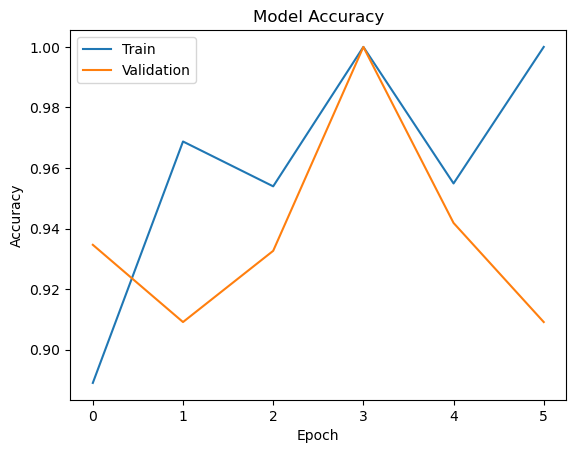

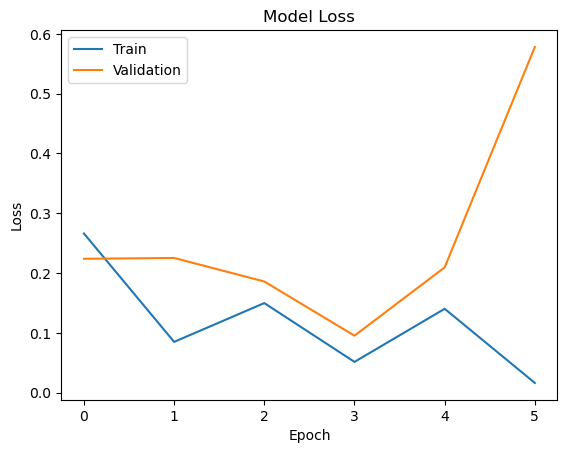

In [27]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğrulukları
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Eğitim ve doğrulama kayıpları
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
